In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [36]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [37]:
#When alpa=.35, R² for the model with many features: 0.443633767129

#Small number of parameters
lass = linear_model.Lasso(alpha=0.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

#Large number of parameters.
lassBig = linear_model.Lasso(alpha=0.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [38]:
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


In [39]:
#Create a plot below of how R2 varies across different values of λ for ridge and lasso regression. 
#Use logic and code similar to the ridge regression demonstration above, 
#and base your plot on the X_train2 feature set.

In [45]:
#Small number of parameters
from sklearn import linear_model

alpha_values = np.arange(0, 20, .2)
lasso_scores = []
ridge_scores = []

for alpha in alpha_values:
    lass = linear_model.Lasso(alpha=alpha) 
    lassfit = lass.fit(X_train2, Y_train)
    lasso_scores.append(lass.score(X_train2, Y_train))

    ridgeregr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridgeregrfit = ridgeregr.fit(X_train2, Y_train)
    ridge_scores.append(ridgeregr.score(X_train2, Y_train))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix de

In [46]:
print(ridge_scores)
print(lasso_scores)

[0.57397331017147024, 0.57397206570731396, 0.57397141144908004, 0.57397055490050997, 0.5739695981426034, 0.5739686014514882, 0.57396760059545959, 0.57396661663415371, 0.57396566164168505, 0.57396474213658066, 0.57396386118106313, 0.57396301968910568, 0.57396221725162277, 0.573961452663313, 0.57396072426079092, 0.57396003013987518, 0.57395936829503236, 0.57395873670833697, 0.57395813340462221, 0.57395755648470892, 0.57395700414438955, 0.57395647468349109, 0.57395596650932434, 0.57395547813552616, 0.57395500817894773, 0.57395455535460349, 0.57395411847036581, 0.57395369642074523, 0.5739532881810131, 0.57395289280116346, 0.57395250940046183, 0.57395213716188542, 0.57395177532712915, 0.57395142319212489, 0.57395108010239548, 0.57395074544937064, 0.57395041866656316, 0.57395009922627549, 0.57394978663650176, 0.57394948043813221, 0.57394918020236796, 0.57394888552832191, 0.57394859604097592, 0.57394831138911973, 0.57394803124362359, 0.57394775529572306, 0.57394748325553502, 0.573947214850678

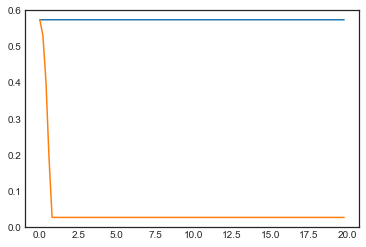

In [47]:
plt.plot(alpha_values, ridge_scores)
plt.plot(alpha_values, lasso_scores)
plt.show()

In [ ]:
#For lasso, as regularization increases, coefficients get closer to zero.
#Lasso takes out features and it's now using less features to predict the model. 
#Ridge works extremely well with correlated features, 
#while lasso is efficient when dealing with unmanageable large feature space